<a href="https://colab.research.google.com/github/galenzo17/AI-personal-test/blob/main/Model_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5543 - loss: 0.6863 - val_accuracy: 0.8010 - val_loss: 0.5484
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8059 - loss: 0.5221 - val_accuracy: 0.8770 - val_loss: 0.4256
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.3864 - val_accuracy: 0.9140 - val_loss: 0.3134
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9399 - loss: 0.2710 - val_accuracy: 0.9330 - val_loss: 0.2348
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9601 - loss: 0.1952 - val_accuracy: 0.9420 - val_loss: 0.1866
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.1555 - val_accuracy: 0.9480 - val_loss: 0.1582
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9825 - loss: 0.1248 - val_accuracy: 0.9520 - val_loss: 0.1386
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9850 - loss: 0.1008 - val_accuracy: 0.9580 - val_loss

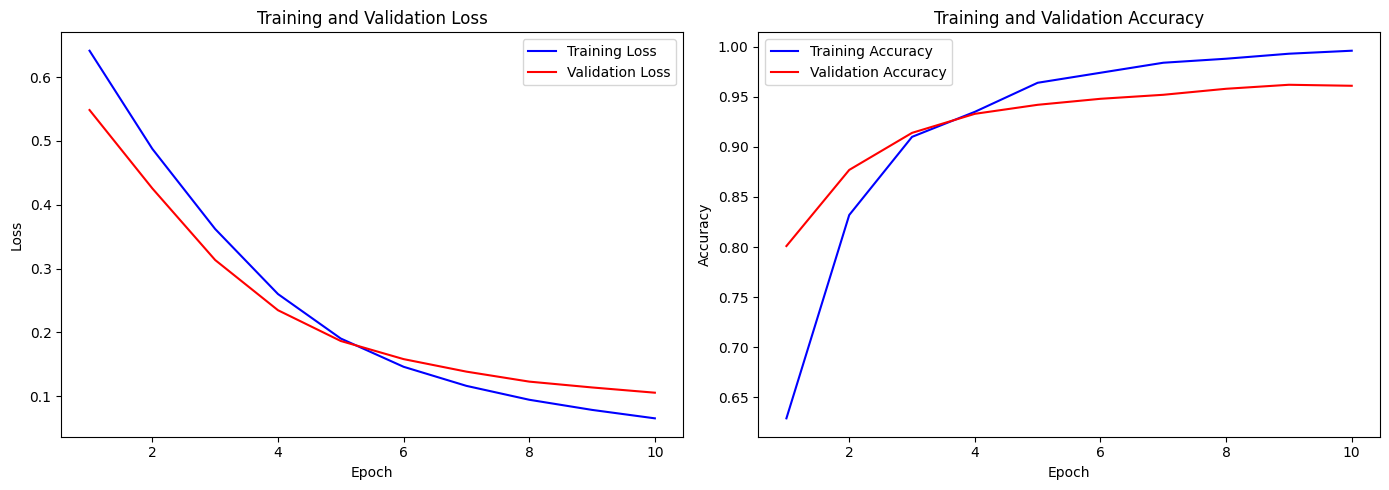

In [1]:
# This Colab code block installs dependencies, simulates input data, trains a simple model,
# and focuses on measurement and visualization of training metrics.
# All code and comments are in English as requested.
# Adjust the number of epochs or the complexity of the model as needed.

# Install dependencies
!pip install matplotlib tensorflow

import sys
import traceback
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

try:
    # Simulate training data
    # Here we create random inputs and random labels for a binary classification problem.
    # In a real scenario, you would replace this with your actual dataset.
    np.random.seed(42)
    num_samples = 1000
    input_dim = 20
    X_train = np.random.randn(num_samples, input_dim).astype(np.float32)
    y_train = (np.sum(X_train, axis=1) > 0).astype(np.float32)  # Labels based on sum threshold

    X_val = np.random.randn(num_samples, input_dim).astype(np.float32)
    y_val = (np.sum(X_val, axis=1) > 0).astype(np.float32)

    # Define a simple model
    # A small neural network for binary classification
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with binary crossentropy loss and an optimizer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and store the history
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Extract metrics from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    # Visualization of the training process
    plt.figure(figsize=(14, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

except Exception as e:
    print("An error occurred:", e)
    traceback.print_exc(file=sys.stdout)